In [1]:
%%time

%run dataframes.ipynb

last valid idx
15899.0
last valid infections
1222.0
             date        province       district  dead_total  population  \
0      2020-03-04    dolnośląskie  bolesławiecki         0.0       90103   
1      2020-03-05    dolnośląskie  bolesławiecki         0.0       90103   
2      2020-03-06    dolnośląskie  bolesławiecki         0.0       90103   
3      2020-03-07    dolnośląskie  bolesławiecki         0.0       90103   
4      2020-03-08    dolnośląskie  bolesławiecki         0.0       90103   
...           ...             ...            ...         ...         ...   
272075 2022-02-13  świętokrzyskie   włoszczowski       158.0       45059   
272076 2022-02-14  świętokrzyskie   włoszczowski       158.0       45059   
272077 2022-02-15  świętokrzyskie   włoszczowski       158.0       45059   
272078 2022-02-16  świętokrzyskie   włoszczowski       158.0       45059   
272079 2022-02-17  świętokrzyskie   włoszczowski       160.0       45059   

        area_ha  density_ppl_per_ha

Empty DataFrame
Columns: [date, province, district, dead_total, population, area_ha, density_ppl_per_ha, new_death, beds_10k, pandemic_day, dead_mean, new_death_mean, dead_in_wave, dead_in_wave_mean, scnd_wave_day, new_death_mean_per_capita]
Index: []
     area_ha  population  density_ppl_per_ha        district  \
0     130351       90103            0.691234   bolesławiecki   
1      47851      100813            2.106811  dzierżoniowski   
2      44327       89102            2.010107       głogowski   
3      73827       34870            0.472320        górowski   
4      58155       50116            0.861766        jaworski   
..       ...         ...                 ...             ...   
375   109306       46724            0.427461      świdwiński   
376   141498       53039            0.374839         wałecki   
377     9834      107048           10.885499        koszalin   
378    30060      401907           13.370160        szczecin   
379    20207       40888            2.023457

In [2]:
%run funkcje.ipynb

In [3]:
print(infections.loc[(infections.date == '2020-03-04'), 'beds_10k'])
print_full(infections.loc[(infections.date == '2020-03-04'), 'beds_10k'])

0         21.25
705       20.27
1410      26.49
2115      22.17
2820      16.22
          ...  
260794    59.53
261499    43.14
262204    46.47
262909    49.92
263614    62.41
Name: beds_10k, Length: 356, dtype: float64
0          21.25
705        20.27
1410       26.49
2115       22.17
2820       16.22
3525       80.09
4230         NaN
4935       87.25
5640       64.58
6345       58.12
7050         NaN
7755       57.42
8460       66.80
9165       84.02
9870      100.36
10575      23.23
11280      35.42
11985        NaN
12690      27.33
13395      53.14
14100      68.64
14805       3.83
15510      32.88
16215      83.03
16920       2.98
17625      65.27
18330      13.19
19035      52.38
19740      16.50
20445      30.48
21150      37.34
21857      20.15
22564       4.74
23271      94.73
23978      30.44
24685      49.51
25392     105.68
26099       8.70
26806      31.13
27513      54.59
28220      26.29
28927      21.05
29634      66.25
30341      44.79
31048      32.50
31755      66.3

In [4]:
infections = infections.loc[infections.beds_10k > 1]
deaths = deaths.loc[deaths.beds_10k > 1]
pop_area_dens = pop_area_dens.loc[pop_area_dens.beds_10k > 1]

In [5]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [6]:
plt.rcParams["figure.figsize"] = (12,8)
plt.rcParams.update({'font.size': 15})

In [7]:
print(beds)
bedsy = beds.district.tolist()
wszystkie = infections.loc[(infections.date == '2020-03-04'), 'district'].tolist()
print(infections.loc[(infections.date == '2020-03-04'), 'district'])

     beds_10k        district            province
0       21.25   bolesławiecki        dolnośląskie
1       20.27  dzierżoniowski        dolnośląskie
2       22.17       głogowski        dolnośląskie
3       26.49        górowski        dolnośląskie
4       16.22        jaworski        dolnośląskie
..        ...             ...                 ...
357     62.56         wałecki  zachodniopomorskie
358      6.61         łobeski  zachodniopomorskie
359     69.43        koszalin  zachodniopomorskie
360     87.46        szczecin  zachodniopomorskie
361     28.10     świnoujście  zachodniopomorskie

[362 rows x 3 columns]
0          bolesławiecki
705       dzierżoniowski
1410            górowski
2115           głogowski
2820            jaworski
               ...      
260794      sandomierski
261499         skarżyski
262204     starachowicki
262909        staszowski
263614      włoszczowski
Name: district, Length: 340, dtype: object


slope = 0.0002027478208648234
intercept = 0
slope_err = 1.357618664069227e-05
R^2 = 0.3838492766234697
p = 1.5299095714498718e-39
S = 41.13831903449261
S_div = 0.9167145569999319
S_med = 1.0718686564484785


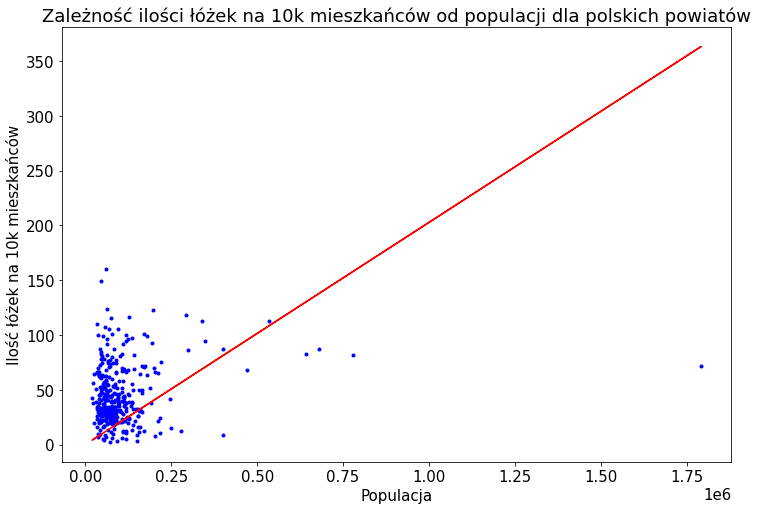

In [8]:
slope, intercept, slope_err, R2, p, S, S_div, S_med = fit_n_plot_linlin_statsmodels(pop_area_dens.population, pop_area_dens.beds_10k,
                              "Zależność ilości łóżek na 10k mieszkańców od populacji dla polskich powiatów", 
                              "Populacja", "Ilość łóżek na 10k mieszkańców")
print("slope = "+str(slope))
print("intercept = "+str(intercept))
print("slope_err = "+str(slope_err))
print("R^2 = "+str(R2))
print("p = "+str(p))
print("S = "+str(S))
print("S_div = "+str(S_div))
print("S_med = "+str(S_med))

In [9]:
# slope, intercept, slope_err, R2, p, S, S_div, S_med = fit_n_plot_linlin_statsmodels(pop_area_dens_cities.population, pop_area_dens_cities.beds_10k,
#                               "Zależność ilości łóżek na 10k mieszkańców od populacji dla polskich miast", 
#                               "Populacja", "Łóżko na 10k mieszkańców")
# print("slope = "+str(slope))
# print("intercept = "+str(intercept))
# print("slope_err = "+str(slope_err))
# print("R^2 = "+str(R2))
# print("p = "+str(p))
# print("S = "+str(S))
# print("S_div = "+str(S_div))
# print("S_med = "+str(S_med))

lambda = 0.08144236584396133
B = 1.1663678082156996
lambda_err = 0.06048571758171547
R^2 = 0.005052739775401438
p = 0.17900437109673148
S = 27.97331849116961
S_div = 0.6233494433000435
S_med = 0.7288514458355813


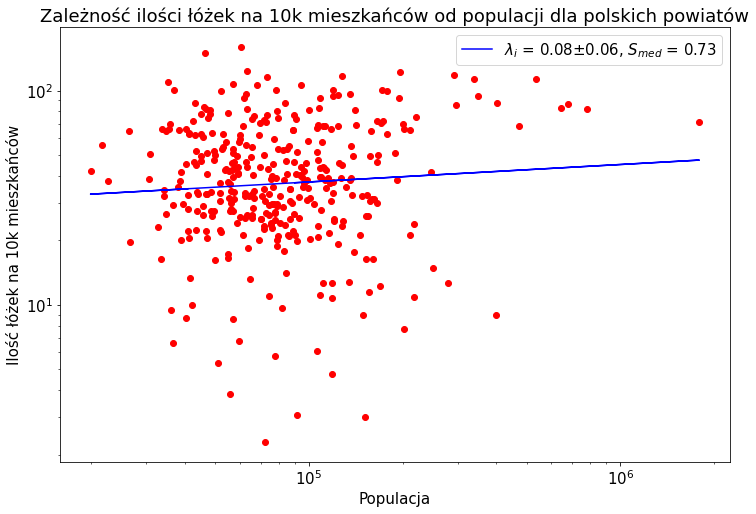

In [10]:
lmbda, B, lmbda_err, R2, p, S, S_div, S_med = fit_n_plot_loglog_statsmodels(pop_area_dens.population, pop_area_dens.beds_10k,
                              "Zależność ilości łóżek na 10k mieszkańców od populacji dla polskich powiatów", 
                              "Populacja", "Ilość łóżek na 10k mieszkańców")
print("lambda = "+str(lmbda))
print("B = "+str(B))
print("lambda_err = "+str(lmbda_err))
print("R^2 = "+str(R2))
print("p = "+str(p))
print("S = "+str(S))
print("S_div = "+str(S_div))
print("S_med = "+str(S_med))

In [11]:
pop_area_dens

,area_ha,population,density_ppl_per_ha,district,province,beds_10k
0,130351,90103,0.691234,bolesławiecki,dolnośląskie,21.25
1,47851,100813,2.106811,dzierżoniowski,dolnośląskie,20.27
2,44327,89102,2.010107,głogowski,dolnośląskie,22.17
3,73827,34870,0.472320,górowski,dolnośląskie,26.49
4,58155,50116,0.861766,jaworski,dolnośląskie,16.22
...,...,...,...,...,...,...
375,109306,46724,0.427461,świdwiński,zachodniopomorskie,22.13
376,141498,53039,0.374839,wałecki,zachodniopomorskie,62.56
377,9834,107048,10.885499,koszalin,zachodniopomorskie,69.43
378,30060,401907,13.370160,szczecin,zachodniopomorskie,87.46


ssr_lin = 605865.3428881635
df_resid_lin = 358.0
ssr_log = 279354.83742480294
df_resid_log = 357.0
lambda = 0.08144236584396133
b = 1.1663678082156996
B = 3.2103109712086324
lambda_err = 0.06048571758171547
R^2_lin = 0.3838492766234697
R^2_log = 0.005052739775401438
S_lin = 41.13831903449261
S_log = 27.97331849116961
S_lin_div = 0.9167145569999319
S_log_div = 0.6233494433000435
S_lin_med = 1.0718686564484785
S_log_med = 0.7288514458355813


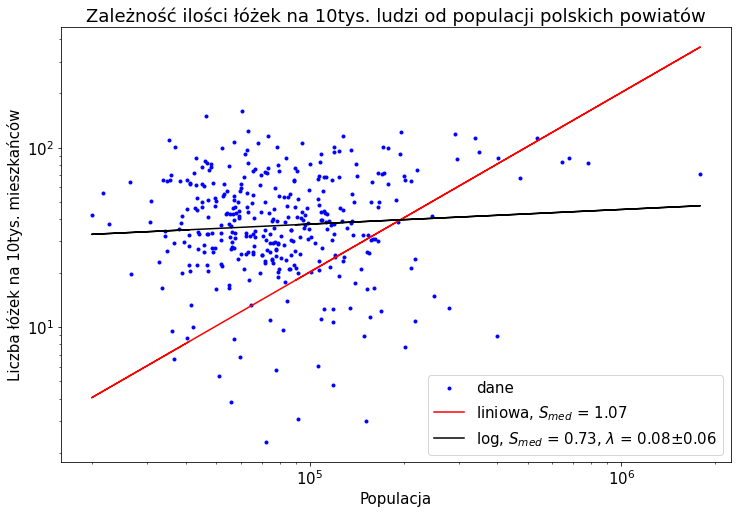

In [12]:
plt.rcParams["figure.figsize"] = (12,8)
plt.rcParams.update({'font.size': 15})

lmbda, B, lmbda_err, R2_lin, R2_log, S_lin, S_log, S_lin_div, S_log_div, S_lin_med, S_log_med = fit_n_plot_lin_n_log_statsmodels(pop_area_dens.population, pop_area_dens.beds_10k,
                              "Zależność ilości łóżek na 10tys. ludzi od populacji polskich powiatów", 
                              "Populacja", "Liczba łóżek na 10tys. mieszkańców")

print("lambda = "+str(lmbda))
print("b = "+str(B))
print("B = "+str(np.exp(B)))
print("lambda_err = "+str(lmbda_err))
print("R^2_lin = "+str(R2_lin))
print("R^2_log = "+str(R2_log))
print("S_lin = "+str(S_lin))
print("S_log = "+str(S_log))
print("S_lin_div = "+str(S_lin_div))
print("S_log_div = "+str(S_log_div))
print("S_lin_med = "+str(S_lin_med))
print("S_log_med = "+str(S_log_med))

plt.savefig("pop_beds.pdf")

ssr_lin = 64900802.94957851
df_resid_lin = 358.0
ssr_log = 104113412.02868542
df_resid_log = 357.0
lambda = 1.0814423658439603
b = -2.8336321917842984
B = 0.05879889646919894
lambda_err = 0.060485717581715476
R^2_lin = 0.8577696525324082
R^2_log = 0.47241593445761576
S_lin = 425.77829803435844
S_log = 540.0316725556609
S_lin_div = 0.8210777642776751
S_log_div = 1.0414058217343771
S_lin_med = 1.5314724384552059
S_log_med = 1.9424278462053566


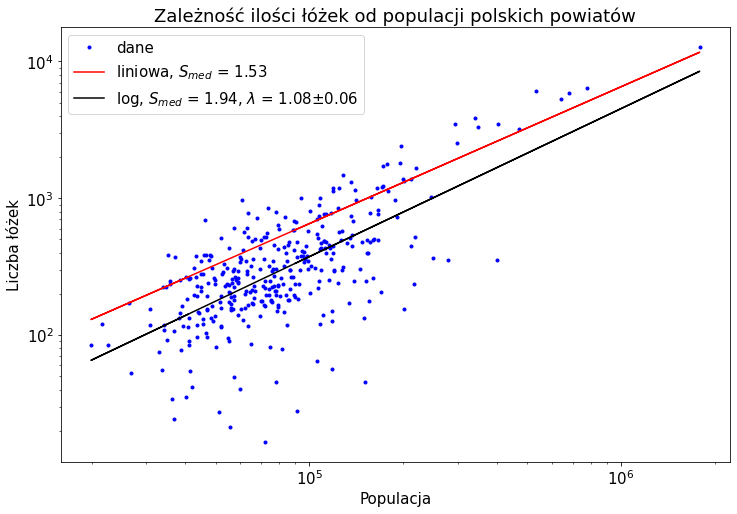

In [26]:
plt.rcParams["figure.figsize"] = (12,8)
plt.rcParams.update({'font.size': 15})

bedss = pop_area_dens.beds_10k * pop_area_dens.population / 10000

lmbda, B, lmbda_err, R2_lin, R2_log, S_lin, S_log, S_lin_div, S_log_div, S_lin_med, S_log_med = fit_n_plot_lin_n_log_statsmodels(pop_area_dens.population, bedss,
                              "Zależność ilości łóżek od populacji polskich powiatów", 
                              "Populacja", "Liczba łóżek")

print("lambda = "+str(lmbda))
print("b = "+str(B))
print("B = "+str(np.exp(B)))
print("lambda_err = "+str(lmbda_err))
print("R^2_lin = "+str(R2_lin))
print("R^2_log = "+str(R2_log))
print("S_lin = "+str(S_lin))
print("S_log = "+str(S_log))
print("S_lin_div = "+str(S_lin_div))
print("S_log_div = "+str(S_log_div))
print("S_lin_med = "+str(S_lin_med))
print("S_log_med = "+str(S_log_med))

plt.savefig("pop_beds.pdf")

ssr_lin = 522418.3049325566
df_resid_lin = 358.0
ssr_log = 189151.3011374412
df_resid_log = 357.0
lambda = 0.23480771940897213
b = 1.5303806260750028
B = 4.619934955391745
lambda_err = 0.02597662856688936
R^2_lin = 0.4687129404780085
R^2_log = 0.18624500117495957
S_lin = 38.20037968648347
S_log = 23.01815755910541
S_lin_div = 0.8512463553059176
S_log_div = 0.5129300517130428
S_lin_med = 0.9953199501428731
S_log_med = 0.5997435528688225


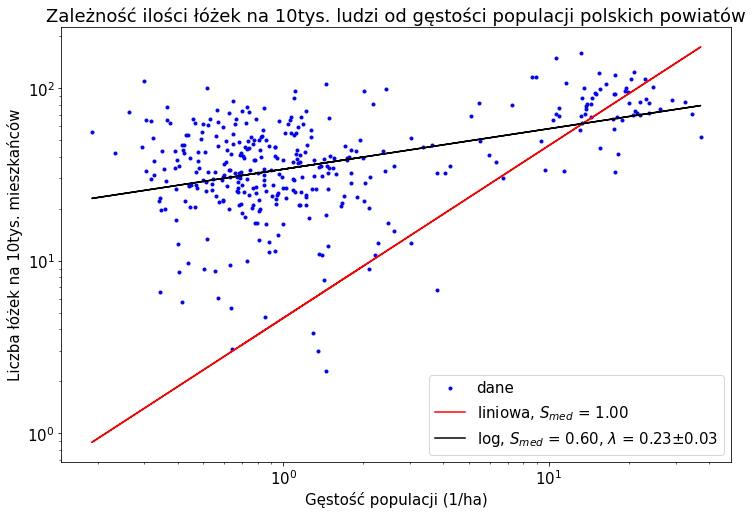

In [13]:
plt.rcParams["figure.figsize"] = (12,8)
plt.rcParams.update({'font.size': 15})

lmbda, B, lmbda_err, R2_lin, R2_log, S_lin, S_log, S_lin_div, S_log_div, S_lin_med, S_log_med = fit_n_plot_lin_n_log_statsmodels(pop_area_dens.density_ppl_per_ha, pop_area_dens.beds_10k,
                              "Zależność ilości łóżek na 10tys. ludzi od gęstości populacji polskich powiatów", 
                              "Gęstość populacji (1/ha)", "Liczba łóżek na 10tys. mieszkańców")

print("lambda = "+str(lmbda))
print("b = "+str(B))
print("B = "+str(np.exp(B)))
print("lambda_err = "+str(lmbda_err))
print("R^2_lin = "+str(R2_lin))
print("R^2_log = "+str(R2_log))
print("S_lin = "+str(S_lin))
print("S_log = "+str(S_log))
print("S_lin_div = "+str(S_lin_div))
print("S_log_div = "+str(S_log_div))
print("S_lin_med = "+str(S_lin_med))
print("S_log_med = "+str(S_log_med))

plt.savefig("dens_beds.pdf")

ssr_lin = 10722.844489518418
df_resid_lin = 65.0
ssr_log = 2607.3342924555714
df_resid_log = 64.0
lambda = 0.24723532350223107
b = -0.09136785325247354
B = 0.912681916130131
lambda_err = 0.06996895988396647
R^2_lin = 0.4841307633445433
R^2_log = 0.16324143283174197
S_lin = 12.84394169639069
S_log = 6.3827578929188835
S_lin_div = 0.7835184345214726
S_log_div = 0.3893671110010351
S_lin_med = 0.827189279660108
S_log_med = 0.41106920511575634


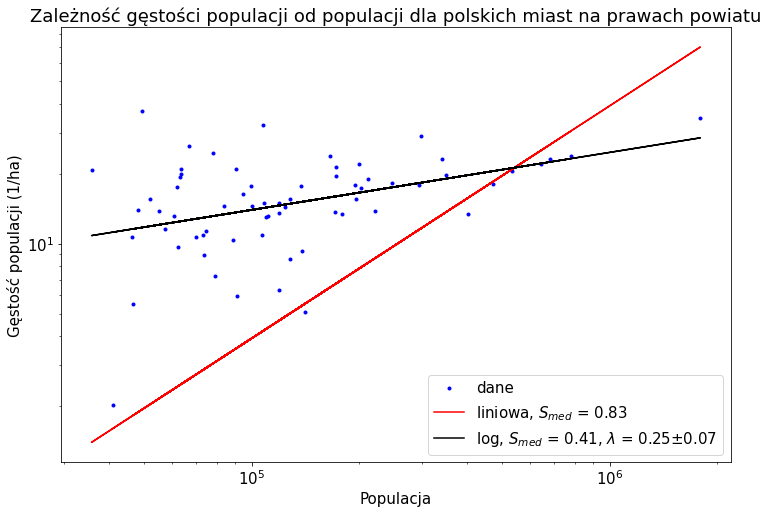

In [14]:
lmbda, B, lmbda_err, R2_lin, R2_log, S_lin, S_log, S_lin_div, S_log_div, S_lin_med, S_log_med = fit_n_plot_lin_n_log_statsmodels(pop_area_dens_cities.population, pop_area_dens_cities.density_ppl_per_ha,
                              "Zależność gęstości populacji od populacji dla polskich miast na prawach powiatu", 
                              "Populacja", "Gęstość populacji (1/ha)")
print("lambda = "+str(lmbda))
print("b = "+str(B))
print("B = "+str(np.exp(B)))
print("lambda_err = "+str(lmbda_err))
print("R^2_lin = "+str(R2_lin))
print("R^2_log = "+str(R2_log))
print("S_lin = "+str(S_lin))
print("S_log = "+str(S_log))
print("S_lin_div = "+str(S_lin_div))
print("S_log_div = "+str(S_log_div))
print("S_lin_med = "+str(S_lin_med))
print("S_log_med = "+str(S_log_med))

miasta = np.exp(B)
#plt.savefig('pop_dens_miasta.eps', format='eps')
#plt.savefig("pop_dens_miasta.pdf", bbox_inches='tight')
plt.savefig("pop_dens_miasta.pdf")

In [15]:
# lmbda, B, lmbda_err, R2_lin, R2_log, S_lin, S_log, S_lin_div, S_log_div, S_lin_med, S_log_med = fit_n_plot_lin_n_log_statsmodels(pop_area_dens_noncities.population, pop_area_dens_noncities.density_ppl_per_ha,
#                               "Zależność gęstości populacji od populacji dla polskich powiatów - nie miast", 
#                               "Populacja", "Gęstość populacji (1/ha)")
# print("lambda = "+str(lmbda))
# print("B = "+str(B))
# print("lambda_err = "+str(lmbda_err))
# print("R^2_lin = "+str(R2_lin))
# print("R^2_log = "+str(R2_log))
# print("S_lin = "+str(S_lin))
# print("S_log = "+str(S_log))
# print("S_lin_div = "+str(S_lin_div))
# print("S_log_div = "+str(S_log_div))
# print("S_lin_med = "+str(S_lin_med))
# print("S_log_med = "+str(S_log_med))

In [16]:
# lmbda, B, lmbda_err, R2_lin, R2_log, S_lin, S_log, S_lin_div, S_log_div, S_lin_med, S_log_med = fit_n_plot_lin_n_log_statsmodels(pop_area_dens_cities.population, pop_area_dens_cities.density_ppl_per_ha,
#                               "Zależność gęstości populacji od populacji dla polskich miast na prawach powiatu", 
#                               "Populacja", "Gęstość populacji (1/ha)")
# print("lambda = "+str(lmbda))
# print("B = "+str(B))
# print("lambda_err = "+str(lmbda_err))
# print("R^2_lin = "+str(R2_lin))
# print("R^2_log = "+str(R2_log))
# print("S_lin = "+str(S_lin))
# print("S_log = "+str(S_log))
# print("S_lin_div = "+str(S_lin_div))
# print("S_log_div = "+str(S_log_div))
# print("S_lin_med = "+str(S_lin_med))
# print("S_log_med = "+str(S_log_med))

ssr_lin = 605865.3428881635
df_resid_lin = 358.0
ssr_log = 279354.83742480294
df_resid_log = 357.0
lambda = 0.08144236584396133
B = 1.1663678082156996
lambda_err = 0.06048571758171547
R^2_lin = 0.3838492766234697
R^2_log = 0.005052739775401438
S_lin = 41.13831903449261
S_log = 27.97331849116961
S_lin_div = 0.9167145569999319
S_log_div = 0.6233494433000435
S_lin_med = 1.0718686564484785
S_log_med = 0.7288514458355813


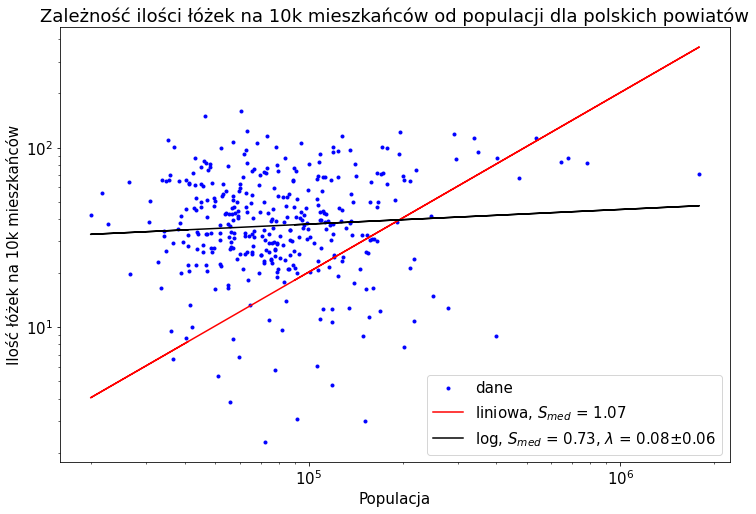

In [17]:
lmbda, B, lmbda_err, R2_lin, R2_log, S_lin, S_log, S_lin_div, S_log_div, S_lin_med, S_log_med = fit_n_plot_lin_n_log_statsmodels(pop_area_dens.population, pop_area_dens.beds_10k,
                              "Zależność ilości łóżek na 10k mieszkańców od populacji dla polskich powiatów", 
                              "Populacja", "Ilość łóżek na 10k mieszkańców")
print("lambda = "+str(lmbda))
print("B = "+str(B))
print("lambda_err = "+str(lmbda_err))
print("R^2_lin = "+str(R2_lin))
print("R^2_log = "+str(R2_log))
print("S_lin = "+str(S_lin))
print("S_log = "+str(S_log))
print("S_lin_div = "+str(S_lin_div))
print("S_log_div = "+str(S_log_div))
print("S_lin_med = "+str(S_lin_med))
print("S_log_med = "+str(S_log_med))

ssr_lin = 522418.3049325566
df_resid_lin = 358.0
ssr_log = 189151.3011374412
df_resid_log = 357.0
lambda = 0.23480771940897213
B = 1.5303806260750028
lambda_err = 0.02597662856688936
R^2_lin = 0.4687129404780085
R^2_log = 0.18624500117495957
S_lin = 38.20037968648347
S_log = 23.01815755910541
S_lin_div = 0.8512463553059176
S_log_div = 0.5129300517130428
S_lin_med = 0.9953199501428731
S_log_med = 0.5997435528688225


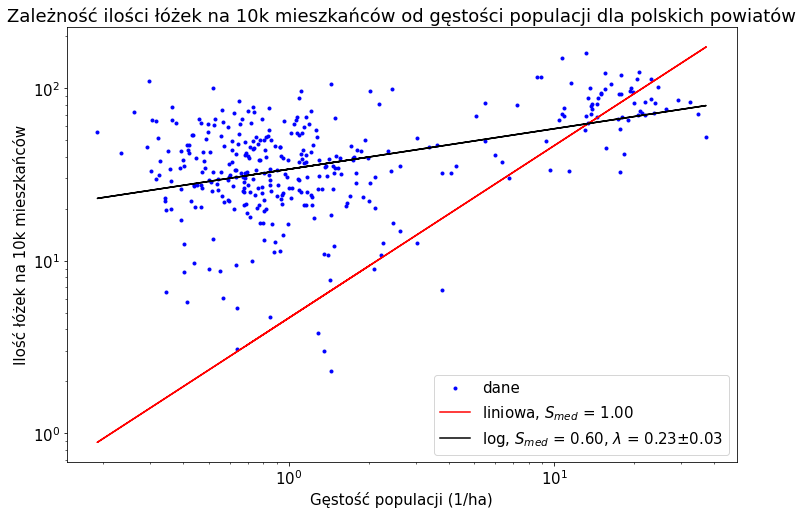

In [18]:
lmbda, B, lmbda_err, R2_lin, R2_log, S_lin, S_log, S_lin_div, S_log_div, S_lin_med, S_log_med = fit_n_plot_lin_n_log_statsmodels(pop_area_dens.density_ppl_per_ha, pop_area_dens.beds_10k,
                              "Zależność ilości łóżek na 10k mieszkańców od gęstości populacji dla polskich powiatów", 
                              "Gęstość populacji (1/ha)", "Ilość łóżek na 10k mieszkańców")
print("lambda = "+str(lmbda))
print("B = "+str(B))
print("lambda_err = "+str(lmbda_err))
print("R^2_lin = "+str(R2_lin))
print("R^2_log = "+str(R2_log))
print("S_lin = "+str(S_lin))
print("S_log = "+str(S_log))
print("S_lin_div = "+str(S_lin_div))
print("S_log_div = "+str(S_log_div))
print("S_lin_med = "+str(S_lin_med))
print("S_log_med = "+str(S_log_med))

exponent = 0.0033157327914419225
exponent error = 0.03157955464944026
B = -1.4331859024672244
R^2 = 3.3204316289392466e-05
p = 0.916442239348523
S = 0.017668667037531102
S_śr = 0.6233494433000435
S_med = 0.7288514458355813


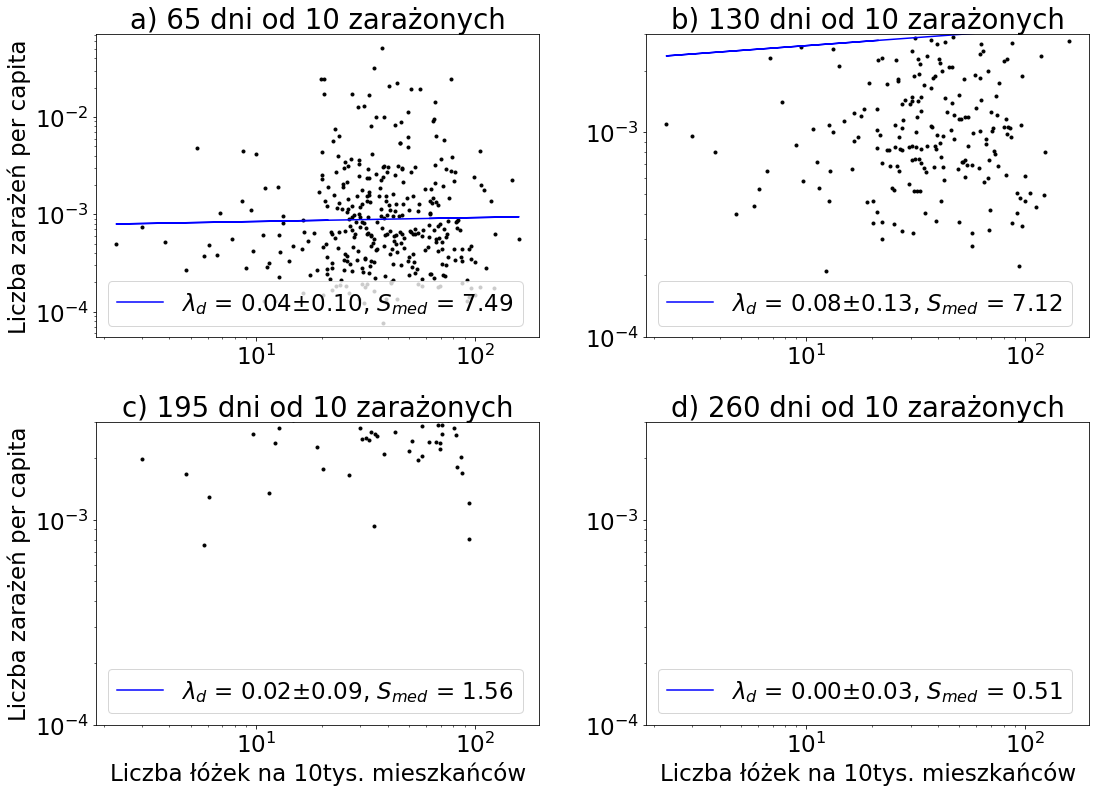

In [19]:
#Wykres całkowitej liczby infekcji per capita od łóżek per capita dla wybranego dnia pandemii razem z dopasowaniem
#skala log-log

plt.rcParams["figure.figsize"] = (16,11.5)
#plt.rcParams["figure.figsize"] = (18,12)
plt.rcParams.update({'font.size': 23})


pandemic_day_num1 = 65
pandemic_day_num2 = 130
pandemic_day_num3 = 195
pandemic_day_num4 = 260

x1 = infections.loc[infections['pandemic_day'] == pandemic_day_num1, 'beds_10k']
y1 = infections.loc[infections['pandemic_day'] == pandemic_day_num1, 'infected_mean'] / infections.loc[infections['pandemic_day'] == pandemic_day_num1, 'population']
x2 = infections.loc[infections['pandemic_day'] == pandemic_day_num2, 'beds_10k']
y2 = infections.loc[infections['pandemic_day'] == pandemic_day_num2, 'infected_mean'] / infections.loc[infections['pandemic_day'] == pandemic_day_num2, 'population']
x3 = infections.loc[infections['pandemic_day'] == pandemic_day_num3, 'beds_10k']
y3 = infections.loc[infections['pandemic_day'] == pandemic_day_num3, 'infected_mean'] / infections.loc[infections['pandemic_day'] == pandemic_day_num3, 'population']
x4 = infections.loc[infections['pandemic_day'] == pandemic_day_num4, 'beds_10k']
y4 = infections.loc[infections['pandemic_day'] == pandemic_day_num4, 'infected_mean'] / infections.loc[infections['pandemic_day'] == pandemic_day_num4, 'population']

#print_full(x1)
#print(y1)


a, b, a_err, R2, p, S, S_div, S_med = fit_n_plot_loglog_statsmodels_x4(x1, y1, x2, y2, x3, y3, x4, y4, "a) "+str(pandemic_day_num1)+" dni od 10 zarażonych", "b) "+str(pandemic_day_num2)+" dni od 10 zarażonych", "c) "+str(pandemic_day_num3)+" dni od 10 zarażonych", "d) "+str(pandemic_day_num4)+" dni od 10 zarażonych", "Liczba łóżek na 10tys. mieszkańców", "Liczba zarażeń per capita")
print("exponent = "+str(a))
print("exponent error = "+str(a_err))
print("B = "+str(b))
print("R^2 = "+str(R2))
print("p = "+str(p))
print("S = "+str(S))
print("S_śr = "+str(S_div))
print("S_med = "+str(S_med))

plt.savefig("inf_beds_"+str(pandemic_day_num1)+"_days.pdf")

exponent = -0.10268797280956374
exponent error = 0.093287478132752
B = -3.001908009713458
R^2 = 0.0038198232509674135
p = 0.27183495663813295
S = 0.000707226171089642
S_śr = 0.6233494433000435
S_med = 0.7288514458355813


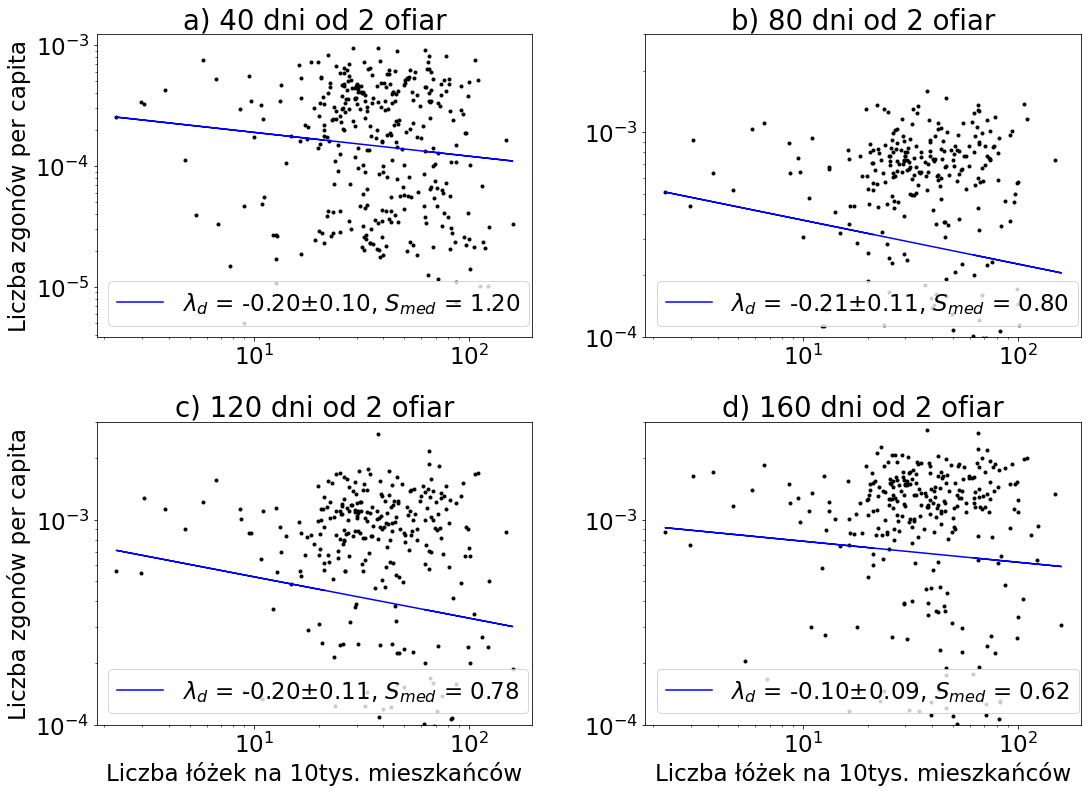

In [20]:
#Wykres całkowitej liczby ofiar per capita od łóżek per capita dla wybranego dnia pandemii razem z dopasowaniem
#skala log-log

plt.rcParams["figure.figsize"] = (16,11.5)
#plt.rcParams["figure.figsize"] = (18,12)
plt.rcParams.update({'font.size': 23})


pandemic_day_num1 = 40
pandemic_day_num2 = 80
pandemic_day_num3 = 120
pandemic_day_num4 = 160

x1 = deaths.loc[deaths['pandemic_day'] == pandemic_day_num1, 'beds_10k']
y1 = deaths.loc[deaths['pandemic_day'] == pandemic_day_num1, 'dead_mean'] / deaths.loc[deaths['pandemic_day'] == pandemic_day_num1, 'population']
x2 = deaths.loc[deaths['pandemic_day'] == pandemic_day_num2, 'beds_10k']
y2 = deaths.loc[deaths['pandemic_day'] == pandemic_day_num2, 'dead_mean'] / deaths.loc[deaths['pandemic_day'] == pandemic_day_num2, 'population']
x3 = deaths.loc[deaths['pandemic_day'] == pandemic_day_num3, 'beds_10k']
y3 = deaths.loc[deaths['pandemic_day'] == pandemic_day_num3, 'dead_mean'] / deaths.loc[deaths['pandemic_day'] == pandemic_day_num3, 'population']
x4 = deaths.loc[deaths['pandemic_day'] == pandemic_day_num4, 'beds_10k']
y4 = deaths.loc[deaths['pandemic_day'] == pandemic_day_num4, 'dead_mean'] / deaths.loc[deaths['pandemic_day'] == pandemic_day_num4, 'population']

#print_full(x1)
#print(y1)




a, b, a_err, R2, p, S, S_div, S_med = fit_n_plot_loglog_statsmodels_x4(x1, y1, x2, y2, x3, y3, x4, y4, "a) "+str(pandemic_day_num1)+" dni od 2 ofiar", "b) "+str(pandemic_day_num2)+" dni od 2 ofiar", "c) "+str(pandemic_day_num3)+" dni od 2 ofiar", "d) "+str(pandemic_day_num4)+" dni od 2 ofiar", "Liczba łóżek na 10tys. mieszkańców", "Liczba zgonów per capita")
print("exponent = "+str(a))
print("exponent error = "+str(a_err))
print("B = "+str(b))
print("R^2 = "+str(R2))
print("p = "+str(p))
print("S = "+str(S))
print("S_śr = "+str(S_div))
print("S_med = "+str(S_med))

plt.savefig("dead_beds_"+str(pandemic_day_num1)+"_days.pdf")

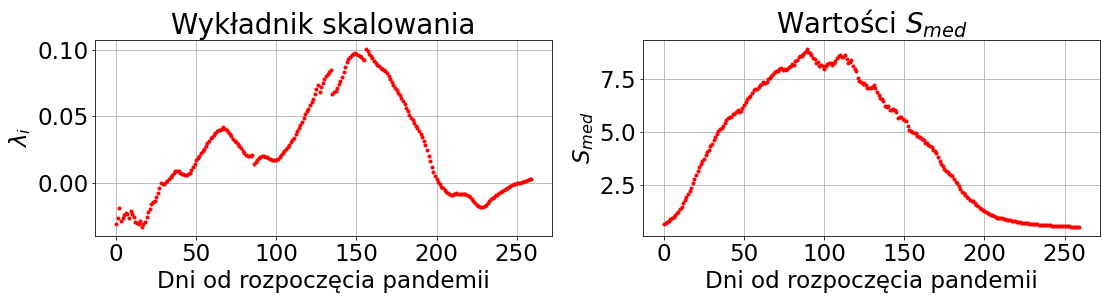

In [21]:
#Wykres wykładnika skalowania dla liczby całkowitych przypadków w zależności od kolejnych dni pandemicznych
#+ wykresy jakości dopasowania
#wykres log-log, łóżka, infekcje, dane ze wszystkich powiatów

days_num = 260

wykladniki = []
wartosci_S_med = []

for i in range(days_num):
    
    x = infections.loc[infections['pandemic_day'] == i, 'beds_10k']
    y = infections.loc[infections['pandemic_day'] == i, 'infected_mean'] / infections.loc[infections['pandemic_day'] == i, 'population']
    
    a, b, a_err, R2, p, S, S_div, S_med = fit_loglog_statsmodels(x, y)
    
    wykladniki.append(a)
    wartosci_S_med.append(S_med)

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(18, 4))
#fig.subplots_adjust(left=0.2, hspace = 0.4)
ax[0].plot(range(days_num), wykladniki, 'ro', markersize=3, label='a')
ax[0].title.set_text('Wykładnik skalowania')
ax[0].set_xlabel('Dni od rozpoczęcia pandemii')
ax[0].set_ylabel('$\lambda_i$')
ax[0].grid(visible = True)
#ax[0].set_ylim([-0.1, 1.2])
ax[1].plot(range(days_num), wartosci_S_med, 'ro', markersize=3, label='S_med')
ax[1].title.set_text('Wartości $S_{med}$')
ax[1].set_xlabel('Dni od rozpoczęcia pandemii')
ax[1].set_ylabel('$S_{med}$')
ax[1].grid(visible = True)
plt.subplots_adjust(bottom=0.2)

plt.savefig("inf_beds_2.pdf")

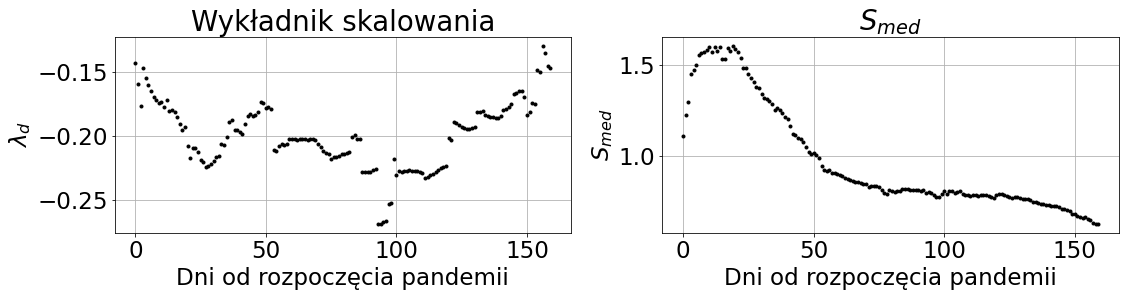

In [22]:
#Wykres wykładnika skalowania dla liczby całkowitych zgonów w zależności od kolejnych dni pandemicznych
#+ wykresy jakości dopasowania
#wykres log-log, łóżka, śmierci, dane ze wszystkich powiatów

days_num = 160

wykladniki = []
wartosci_S_med = []

for i in range(days_num):
    x = deaths.loc[deaths['pandemic_day'] == i, 'beds_10k']
    y = deaths.loc[deaths['pandemic_day'] == i, 'dead_mean'] / deaths.loc[deaths['pandemic_day'] == i, 'population']
    
    a, b, a_err, R2, p, S, S_div, S_med = fit_loglog_statsmodels(x, y)
    
    wykladniki.append(a)
    wartosci_S_med.append(S_med)

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(18, 4))
#fig.subplots_adjust(left=0.2, hspace = 0.4)
ax[0].plot(range(days_num), wykladniki, 'o', markersize=3, color = 'black', label='a')
ax[0].title.set_text('Wykładnik skalowania')
ax[0].set_xlabel('Dni od rozpoczęcia pandemii')
ax[0].set_ylabel('$\lambda_d$')
ax[0].grid(visible = True)
#ax[0].set_ylim([-0.1, 1.2])
ax[1].plot(range(days_num), wartosci_S_med, 'o', markersize=3, color = 'black', label='S_med')
ax[1].title.set_text('$S_{med}$')
ax[1].set_xlabel('Dni od rozpoczęcia pandemii')
ax[1].set_ylabel('$S_{med}$')
ax[1].grid(visible = True)
plt.subplots_adjust(bottom=0.2)

plt.savefig("dead_beds_5.pdf")

In [23]:
print_full(infections.loc[infections.pandemic_day == 0, "beds_10k"])

44         21.25
743        20.27
1438       26.49
2163       22.17
2890       16.22
3553       80.09
5040       87.25
5670       64.58
6399       58.12
7780       57.42
8482       66.80
9209       84.02
9920      100.36
10596      23.23
11315      35.42
12724      27.33
13422      53.14
14146      68.64
14864       3.83
15536      32.88
16225      83.03
16943       2.98
17674      65.27
18372      13.19
19082      52.38
19786      16.50
20491      30.48
21284      37.34
21885      20.15
22588       4.74
23287      94.73
24008      30.44
24866      49.51
25441     105.68
26266       8.70
26875      31.13
27562      54.59
28385      26.29
28962      21.05
29800      66.25
30508      44.79
31213      32.50
31783      66.35
32496      11.16
33360      27.49
34030      32.13
34612      57.57
36036      30.75
36738      25.18
37517      12.58
38219     106.84
38892      31.57
39610      92.05
40253       5.78
41079      55.48
41771      60.93
42477      43.95
43136      39.42
43918      29.

In [24]:
print_full(pop_area_dens)

     area_ha  population  density_ppl_per_ha                 district  \
0     130351       90103            0.691234            bolesławiecki   
1      47851      100813            2.106811           dzierżoniowski   
2      44327       89102            2.010107                głogowski   
3      73827       34870            0.472320                 górowski   
4      58155       50116            0.861766                 jaworski   
6      39569       43239            1.092749           kamiennogórski   
7     164330      157996            0.961456                  kłodzki   
9      42830       54254            1.266729                 lubański   
10     71162      106150            1.491667                 lubiński   
11     70969       45925            0.647114                 lwówecki   
12     71493       36999            0.517519                  milicki   
13    104931      107269            1.022281                oleśnicki   
14     52410       76752            1.464453       

In [25]:
#Wykres wykładnika skalowania dla liczby całkowitych przypadków w zależności od kolejnych dni pandemicznych
#+ wykresy jakości dopasowania
#wykres log-log, łóżko na mieszkańca, infekcje per capita, dane ze wszystkich powiatów

#max days_num = 695
days_num = 600
wykladniki = []
wykladniki_err = []
wartosci_R2 = []
wartosci_p = []
wartosci_S = []
wartosci_S_div = []
wartosci_S_med = []

for i in range(days_num):
    x = infections.loc[infections['pandemic_day'] == i, 'beds_10k']
    y = infections.loc[infections['pandemic_day'] == i, 'infected_mean']
    
    x = infections.loc[infections['pandemic_day'] == i, 'density_ppl_per_ha']
    y = infections.loc[infections['pandemic_day'] == i, 'dead_mean']
    popul = deaths.loc[deaths['pandemic_day'] == i, 'population']
    y = y/popul
    a, b, a_err, R2, p, S, S_div, S_med = fit_loglog_statsmodels(x, y)
    
    wykladniki.append(a)
    wykladniki_err.append(a_err)
    wartosci_R2.append(R2)
    wartosci_p.append(p)
    wartosci_S.append(S)
    wartosci_S_div.append(S_div)
    wartosci_S_med.append(S_med)

fig, ax = plt.subplots(nrows=3, ncols=2, figsize=(21, 10))
fig.subplots_adjust(left=0.2, hspace = 0.4)
ax[0,0].plot(range(days_num), wykladniki, 'bo', markersize=3, label='a')
ax[0,0].title.set_text('Wykładnik skalowania dla zarażonych')
ax[0,0].grid(visible = True)
#ax[0,0].set_ylim([-0.1, 1.2])
ax[0,1].plot(range(days_num), wykladniki_err, 'bo', markersize=3, label='a_err')
ax[0,1].title.set_text('Odchylenie standardowe wykładnika skalowania dla zarażonych')
ax[0,1].ticklabel_format(style='plain')
ax[1,0].plot(range(days_num), wartosci_R2, 'bo', markersize=3, label='R2')
ax[1,0].title.set_text('Wartosci R2 dla zarażonych')
ax[1,0].set_ylim([0, 1])
ax[1,1].plot(range(days_num), wartosci_p, 'bo', markersize=3, label='p')
ax[1,1].title.set_text('Wartosci p dla zarażonych')
ax[1,1].set_yscale("log")
ax[2,0].plot(range(days_num), wartosci_S_div, 'bo', markersize=3, label='S_śr')
ax[2,0].title.set_text('Wartosci $S_{śr}$ dla zarażonych')
ax[2,1].plot(range(days_num), wartosci_S_med, 'bo', markersize=3, label='S_med')
ax[2,1].title.set_text('Wartosci $S_{med}$ dla zarażonych')

# ax[2,0].plot(range(days_num), wartosci_S, 'bo', markersize=3, label='S')
# ax[2,0].title.set_text('Wartosci S dla zarażonych')
# ax[2,0].set_position([0.392,0.132,0.318,0.2])
# ax[2,1].set_visible(False)

KeyError: 'dead_mean'

In [ ]:
#Wykres wykładnika skalowania dla liczby całkowitych śmierci w zależności od kolejnych dni pandemicznych
#+ wykresy jakości dopasowania
#wykres log-log, łóżko na mieszkańca, śmierci, dane ze wszystkich powiatów

#max days_num = 695
days_num = 600
wykladniki = []
wykladniki_err = []
wartosci_R2 = []
wartosci_p = []
wartosci_S = []
wartosci_S_div = []
wartosci_S_med = []

for i in range(days_num):
    x = deaths.loc[deaths['pandemic_day'] == i, 'beds_10k']
    y = deaths.loc[deaths['pandemic_day'] == i, 'dead_mean']
    #print(i)
    a, b, a_err, R2, p, S, S_div, S_med = fit_loglog_statsmodels(x, y)
    
    wykladniki.append(a)
    wykladniki_err.append(a_err)
    wartosci_R2.append(R2)
    wartosci_p.append(p)
    wartosci_S.append(S)
    wartosci_S_div.append(S_div)
    wartosci_S_med.append(S_med)

fig, ax = plt.subplots(nrows=3, ncols=2, figsize=(21, 10))
fig.subplots_adjust(left=0.2, hspace = 0.4)
ax[0,0].plot(range(days_num), wykladniki, 'bo', markersize=3, label='a')
ax[0,0].title.set_text('Wykładnik skalowania dla śmierci')
ax[0,0].grid(visible = True)
ax[0,0].set_ylim([-0.1, 1.2])
ax[0,1].plot(range(days_num), wykladniki_err, 'bo', markersize=3, label='a_err')
ax[0,1].title.set_text('Odchylenie standardowe wykładnika skalowania dla śmierci')
ax[0,1].ticklabel_format(style='plain')
ax[1,0].plot(range(days_num), wartosci_R2, 'bo', markersize=3, label='R2')
ax[1,0].title.set_text('Wartosci R2 dla śmierci')
ax[1,0].set_ylim([0, 1])
ax[1,1].plot(range(days_num), wartosci_p, 'bo', markersize=3, label='p')
ax[1,1].title.set_text('Wartosci p dla śmierci')
ax[1,1].set_yscale("log")
ax[2,0].plot(range(days_num), wartosci_S_div, 'bo', markersize=3, label='S_śr')
ax[2,0].title.set_text('Wartosci $S_{śr}$ dla śmierci')
ax[2,1].plot(range(days_num), wartosci_S_med, 'bo', markersize=3, label='S_med')
ax[2,1].title.set_text('Wartosci $S_{med}$ dla śmierci')

# ax[2,0].plot(range(days_num), wartosci_S, 'bo', markersize=3, label='S')
# ax[2,0].title.set_text('Wartosci S dla zarażonych')
# ax[2,0].set_position([0.392,0.132,0.318,0.2])
# ax[2,1].set_visible(False)